Download Data for assignment use
from urllib.request import urlretrieve
urlretrieve("https://raw.githubusercontent.com/dompazz/FinTech590-RiskManagement/main/Week02/Project/problem2.csv", "problem2.csv")

# Problem 1
Compare the conditional distribution of the Multivariate Normal, to the OLS equations. Are
these values the same? Why?
Use the data in problem1.csv to prove your answer empirically.

In [291]:
#import packages and data for problem1.
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df1 = pd.read_csv('problem1.csv')
df1


,x,y
0,-1.166289,1.014680
1,-0.426878,0.262715
2,-1.477892,-1.044772
3,3.049119,0.804363
4,-2.123732,-0.689514
...,...,...
95,-0.588599,0.652704
96,-0.218138,0.067676
97,0.342822,1.214472
98,0.337376,0.608974


In [292]:
#create a new dataframe switch y and x column
df2 = df1[['y','x']]
df2

,y,x
0,1.014680,-1.166289
1,0.262715,-0.426878
2,-1.044772,-1.477892
3,0.804363,3.049119
4,-0.689514,-2.123732
...,...,...
95,0.652704,-0.588599
96,0.067676,-0.218138
97,1.214472,0.342822
98,0.608974,0.337376


In [293]:
#Calculate the mean for x and y
x = df1["x"]
y = df1["y"]
##print(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
print(x_mean, y_mean)


-0.14054562796809714 -0.022277188035264378


In [294]:
#Calculate the covariance for dataframe and save it to array
df_cov = df2.cov()
df_cov1 = df_cov.to_numpy()
df_cov1

array([[0.89888315, 0.56290833],
       [0.56290833, 1.315195  ]])

In [295]:
#calculate U hat for conditional distribution by using formula
#Set a = 1
a = 1
u_hat = y_mean + (df_cov1[0][1] / df_cov1[1][1]) * (a - x_mean)
u_hat

0.46588056652086507

In [296]:
#Calculate variance hat for conditional distribution by using formula
var_hat = df_cov1[0][0] - (df_cov1[0][1] / df_cov1[1][1]) * df_cov1[0][1]
var_hat

0.6579563030192092

In [297]:
#second part
#Do the OLS equation using the package OLS and show the result summary
model = sm.OLS(y - y_mean,x - x_mean)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.268
Model:                            OLS   Adj. R-squared (uncentered):              0.261
Method:                 Least Squares   F-statistic:                              36.25
Date:                Sat, 15 Jan 2022   Prob (F-statistic):                    2.95e-08
Time:                        00:53:33   Log-Likelihood:                         -120.46
No. Observations:                 100   AIC:                                      242.9
Df Residuals:                      99   BIC:                                      245.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [298]:
#Compare the variance difference between these two methods
var_hat, results.resid @ results.resid.T / (100 - 1)

(0.6579563030192092, 0.6579563030192092)

In [299]:
#Compare the mean difference between these two methods
u_hat, results.predict(1 - x_mean) + y_mean

(0.46588056652086507, array([0.46588057]))

# Problem 2
Fit the data in problem2.csv using OLS and calculate the error vector. Look at it’s distribution.
How well does it fit the assumption of normally distributed errors?
Fit the data using MLE given the assumption of normality. Then fit the MLE using the
assumption of a T distribution of the errors. Which is the best fit?
What are the fitted parameters of each and how do they compare? What does this tell us about
the breaking of the normality assumption in regards to expected values in this case?


In [274]:
#import data for problem 2
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

df3 = pd.read_csv('problem2.csv')
df3

,x,y
0,-1.614399,-1.695691
1,-0.900999,0.409843
2,-0.170662,1.043979
3,2.097252,2.708814
4,0.140208,0.052374
...,...,...
95,-1.115215,-2.145361
96,-0.564690,-1.916765
97,-1.098674,-0.110209
98,-0.562357,0.181756


In [275]:
#switch y and x
df4 = df3[['y','x']]
df4

,y,x
0,-1.695691,-1.614399
1,0.409843,-0.900999
2,1.043979,-0.170662
3,2.708814,2.097252
4,0.052374,0.140208
...,...,...
95,-2.145361,-1.115215
96,-1.916765,-0.564690
97,-0.110209,-1.098674
98,0.181756,-0.562357


In [276]:
#Calculate mean 
x = df3["x"]
y = df3["y"]
x_mean = np.mean(x)
y_mean = np.mean(y)
print(x_mean, y_mean)

-0.00010758502304888395 0.11977108786925257


In [277]:
#Calculate Variance
df_cov2 = df3.cov()
df_cov3 = df_cov2.to_numpy()
df_cov3

array([[0.95719434, 0.57929862],
       [0.57929862, 1.80124935]])

In [278]:
#Calculate OLS
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.193
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              23.69
Date:                Sat, 15 Jan 2022   Prob (F-statistic):                    4.28e-06
Time:                        00:53:01   Log-Likelihood:                         -160.49
No. Observations:                 100   AIC:                                      323.0
Df Residuals:                      99   BIC:                                      325.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

eval_env: 1


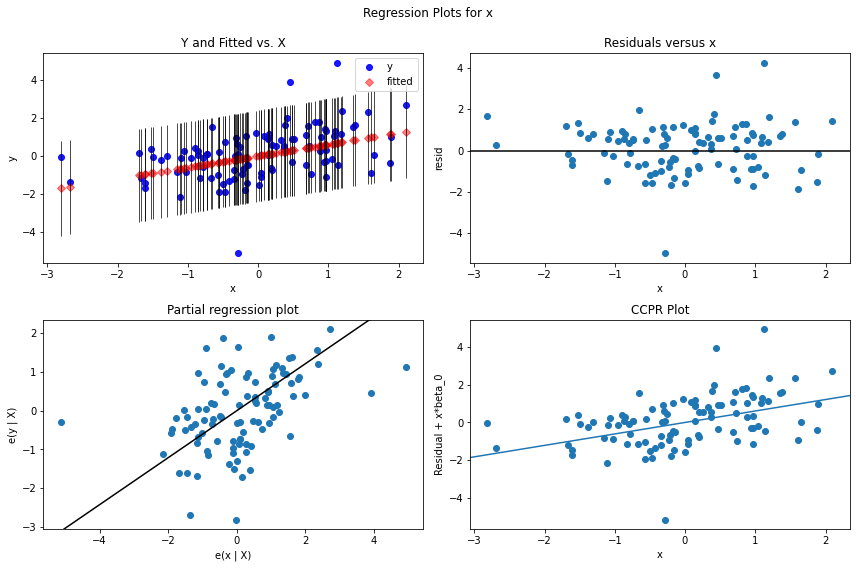

In [279]:
#define figure size
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'x', fig=fig)

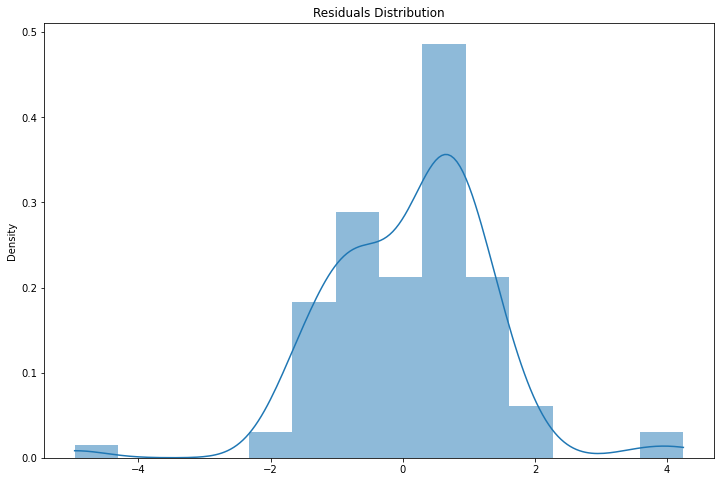

In [280]:
#Draw histplot to show the residuals distribution
import seaborn as sns
plt.subplots(figsize = (12, 8))
plt.title('Residuals Distribution')
sns.histplot(results.resid, kde=True, stat="density", linewidth=0)
plt.show()

In [281]:
#Cannot determine the normal distribution according to the plot, so do some normal distribution tests
#Normal distribution test1
from scipy.stats import normaltest
stat, p1 = normaltest(results.resid)
print('stat = %.3f, p = %.3f\n' % (stat, p1))
if p1 > 0.05:
    print('It is normal distribution')
else:
    print('It is not normal distribution')


stat = 14.146, p = 0.001

It is not normal distribution


In [282]:
##Normal distribution test2
from scipy.stats import shapiro
stat, p2 = shapiro(results.resid)
print('stat = %.3f, p = %.3f\n' % (stat, p2))
if p1 > 0.05:
    print('It is normal distribution')
else:
    print('It is not normal distribution')

stat = 0.938, p = 0.000

It is not normal distribution


## Result: It not fit the assumtion of normally distributed error

# Part 2

Fit the data using MLE given the assumption of normality. Then fit the MLE using the assumption of a T distribution of the errors. Which is the best fit?

In [283]:
#Calculate the residuals mean and variance
y_mean = np.mean(y)
y_var = np.var(y)
print(r_mean, r_var)

0.11983619737968695 1.4361484855816655


In [284]:
#fit data using MLE given the assumption of normality by using scipy package
from scipy import stats
from scipy.optimize import minimize
def MLE_Norm(parameters):
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL
mle_model = minimize(MLE_Norm, np.array([1,1,1]), method='L-BFGS-B')
mle_model ##(mean, beta, sd)

      fun: 159.99209669028738
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.13686838e-05, -3.58113537e-04,  1.93267625e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([0.11983595, 0.60519932, 1.19839547])

In [285]:
# Calculate the residuals using the beta
y_pred = mle_model.x[0] + x * mle_model.x[1]
y_resi = y - y_pred
y_resi

0    -0.838493
1     0.835291
2     1.027428
3     1.319722
4    -0.152316
        ...   
95   -1.590270
96   -1.694851
97    0.434872
98    0.402258
99   -0.922313
Length: 100, dtype: float64

In [286]:
## Using the assumtion of a T distribution of the errors
from scipy.stats import t
r_compare_t = t.fit(y_resi)
r_compare_t

(6.333315171406576, 0.025666439570494786, 0.9735875321845389)

In [287]:
# Using Information Criteria to determine which one better
# AIC score for Normality
# k = p + d = 3
AIC_norm = 2*3 - 2*(-mle_model.fun)
AIC_norm

325.98419338057477

In [288]:
#AIC score for T
#First calculate the likehood
data, m, s = r_compare_t
loglikely_t = np.log(np.product(t.pdf(y_resi,data,m,s)))
loglikely_t

-155.55930114858745

In [289]:
#Calculate the AIC
AIC_t = 2*3 - 2*(loglikely_t)
AIC_t

317.1186022971749

In [290]:
#compare
if AIC_norm < AIC_t:
    print('Assumption of normality best fit')
else:
    print('Assumption of t best fit')

Assumption of t best fit


# Problem 3
Simulate AR(1) through AR(3) and MA(1) through MA(3) processes. Compare their ACF and
PACF graphs. How do the graphs help us to identify the type and order of each process?

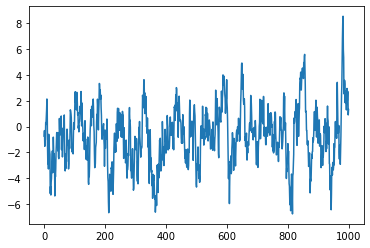

In [300]:
#AR(1) simulate, Using ArmaProcess package to calculate. Set ar(1) to [1, -0.9]. Do the AR(1) simulate
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample = 1000)
plt.plot(simulated_data)

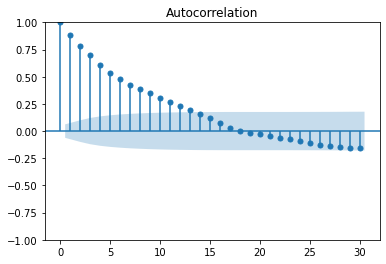

In [301]:
#draw ACF graph using plot_acf package
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data)
plt.show()

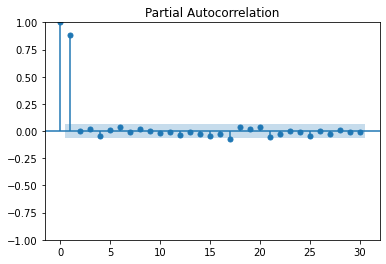

In [302]:
#draw PACF graph using plot_pacf package
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data, method = "ywm", alpha = 0.05)
plt.show()

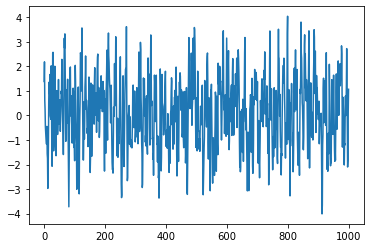

In [303]:
#AR(2) Simulate
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9, 0.3])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample = 1000)
plt.plot(simulated_data)

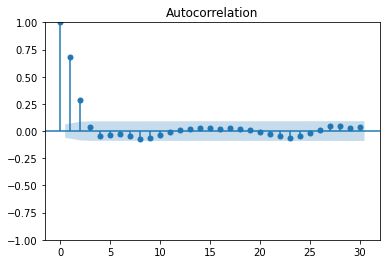

In [304]:
#draw ACF graph
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data)
plt.show()

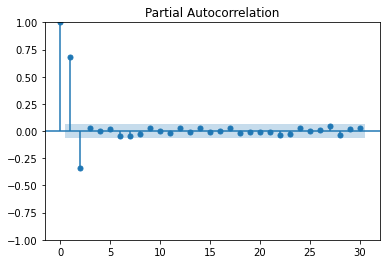

In [305]:
#draw PACF graph
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data, method = "ywm", alpha = 0.05)
plt.show()

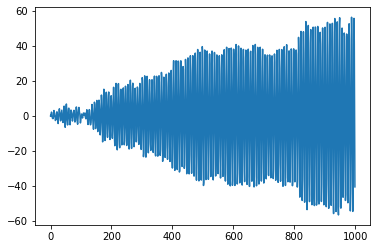

In [306]:
#AR(2) Simulate
from statsmodels.tsa.arima_process import ArmaProcess
ar = np.array([1, -0.9, 0.3, 0.5])
ma = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample = 1000)
plt.plot(simulated_data)

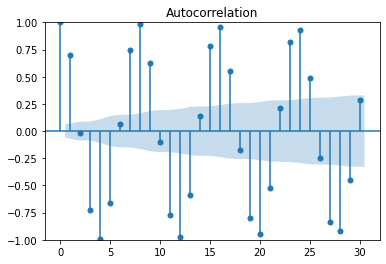

In [307]:
#draw ACF graph
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data)
plt.show()

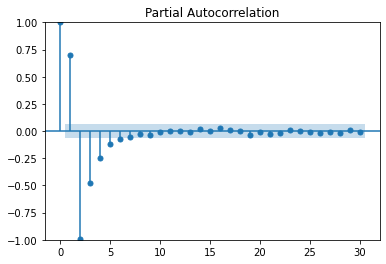

In [308]:
#draw PACF graph
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data, method = "ywm", alpha = 0.05)
plt.show()

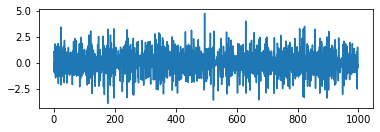

In [185]:
#Do MA(1) simulation 
from statsmodels.tsa.arima_process import ArmaProcess
plt.subplot(2,1,1)
ar = np.array([1])
ma = np.array([1, -0.9])
MA_object = ArmaProcess(ar, ma)
simulated_data_1 = MA_object.generate_sample(nsample = 1000)
plt.plot(simulated_data_1)

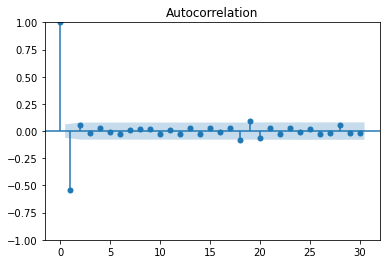

In [186]:
#draw ACF graph
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data_1)
plt.show()

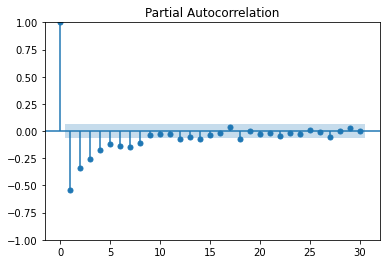

In [187]:
#draw PACF graph
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data_1, method = "ywm", alpha = 0.05)
plt.show()

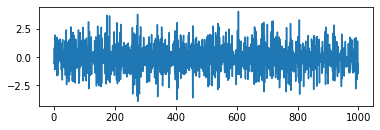

In [188]:
#Do MA(2) simulation
from statsmodels.tsa.arima_process import ArmaProcess
plt.subplot(2,1,1)
ar = np.array([1])
ma = np.array([1, -0.9, 0.3])
MA_object = ArmaProcess(ar, ma)
simulated_data_1 = MA_object.generate_sample(nsample = 1000)
plt.plot(simulated_data_1)

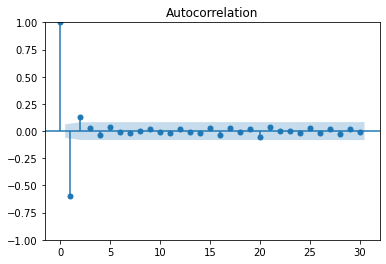

In [189]:
#draw ACF graph
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data_1)
plt.show()

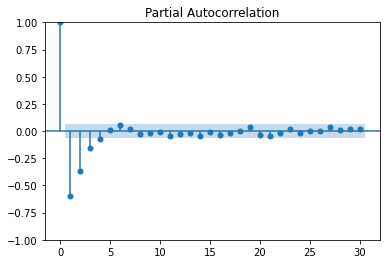

In [190]:
#draw PACF graph
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data_1, method = "ywm", alpha = 0.05)
plt.show()

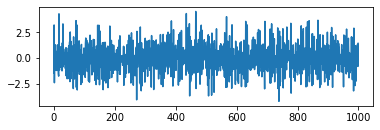

In [191]:
#Do MA(3) Simulation
from statsmodels.tsa.arima_process import ArmaProcess
plt.subplot(2,1,1)
ar = np.array([1])
ma = np.array([1, -0.9, 0.3, 0.5])
MA_object = ArmaProcess(ar, ma)
simulated_data_1 = MA_object.generate_sample(nsample = 1000)
plt.plot(simulated_data_1)

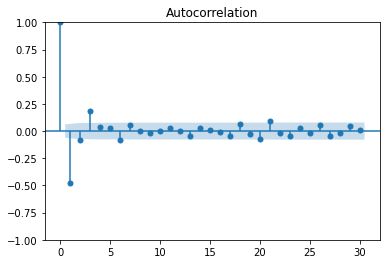

In [192]:
#draw ACF graph
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(simulated_data_1)
plt.show()

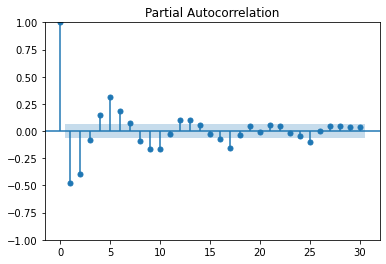

In [193]:
#draw PACF graph
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_data_1, method = "ywm", alpha = 0.05)
plt.show()